Import Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

Read in Dataset

In [0]:
#attribute list
col_names = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income',]

In [0]:
#reading in the training data and the data to be predicted
adult_data_train=pd.read_csv('adult.data',names=col_names)
adult_data_predict= pd.read_csv('adult.test', names=col_names, skiprows=1)

EDA

In [23]:
adult_data_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
adult_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [35]:
adult_data_train.sex.unique()

array([' Male', ' Female'], dtype=object)

In [34]:
adult_data_train.race.unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [33]:
adult_data_train.relationship.unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [29]:
adult_data_train.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [28]:
adult_data_train.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [26]:
adult_data_train.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [27]:
adult_data_train.income.unique()

array([' <=50K', ' >50K'], dtype=object)

In [9]:
adult_data_train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Visualisations

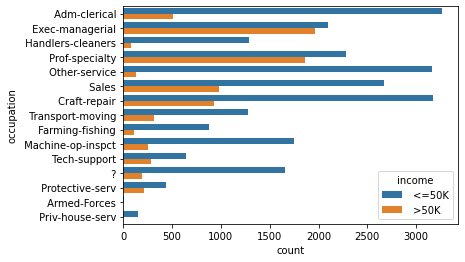

In [24]:
sns.countplot(y='occupation', hue='income', data=adult_data_train)

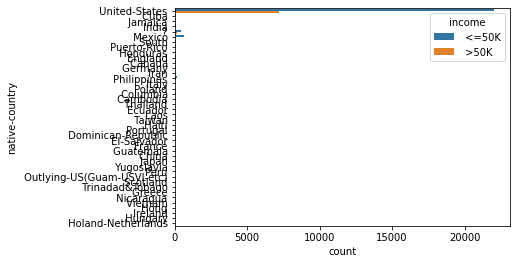

In [37]:
sns.countplot(y='native-country', hue='income', data=adult_data_train)

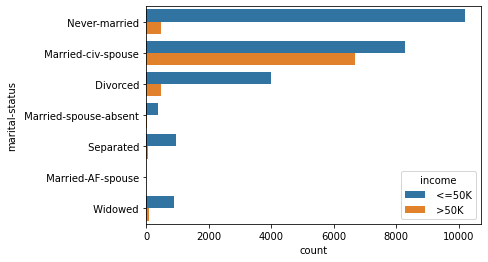

In [36]:
sns.countplot(y='marital-status', hue='income', data=adult_data_train)

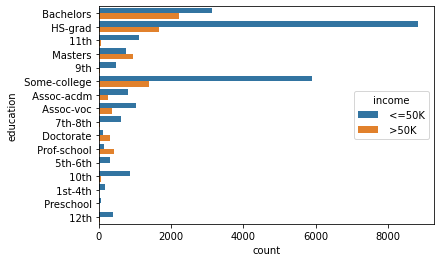

In [25]:
sns.countplot(y='education', hue='income', data=adult_data_train)

# Preprocessing the data

Handle the missing values

In [20]:
#finding out if there are missing values:
adult_data_train.isnull().values.sum()              #total number of missing values

0

The missing values (in the form of "?") occurs in the column "workclass" and "occupation", both containing categorical data. So "?" will be considered as another category. And even if we replace the "?" with some other data, that wont be justified. One way is to drop the rows with the "?" categorical values.

In [0]:
#Ecoding the categorical data
label_encoder=LabelEncoder()
train_data_encoded=adult_data_train.apply(label_encoder.fit_transform)
predict_data_encoded=adult_data_predict.apply(label_encoder.fit_transform)

Standardize scale to prep for KNN Algo

Split into training and test data sets

create and train the model

Make predictions with the model

Evaluate alternative k values for better prediction

Plot error rate

Adjust K value per error rate evaluations

In [0]:
#3. Split into the train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,adult_data_train['income'],test_size=0.2)

# The KNN Model

Text(0, 0.5, 'Testing Accuracy')

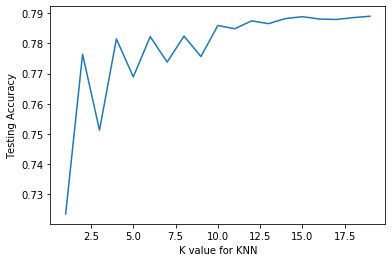

In [0]:
#1.Find the optimum value of k
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_range=range(1,20)
scores={}
scores_list=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    sc=metrics.accuracy_score(y_test,y_pred)
    scores[k]=sc
    scores_list.append(sc)
    
plt.plot(k_range,scores_list)
plt.xlabel('K value for KNN')
plt.ylabel('Testing Accuracy')

In [0]:
#Train the knn model with optimum value of k
k_optimum=15
knn=KNeighborsClassifier(n_neighbors=k_optimum)
knn.fit(X_train,y_train)
knn.score(X_test, y_test)

0.7888837709196991

In [0]:
#predict the value for the test sets
prediction=knn.predict(data_predict)

In [0]:
pred=pd.DataFrame(prediction,columns=['pred'])

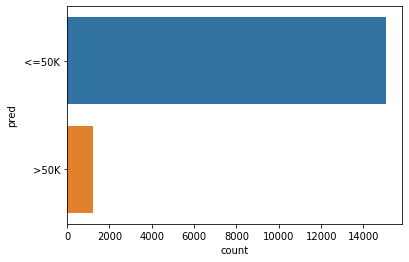

In [0]:
sns.countplot(y='pred',data=pred,)